importing pandas, matplotlib and numpy libraries.
define the csv train file as train.

In [1]:
from scipy import stats
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('train.csv')


In [2]:
##Yaad you might need to install ce
##pip install category_encoders
##or
##conda install -c conda-forge category_encoders

# Data exploration:

In [3]:
df.shape

(22161, 26)

In [4]:
#1.Checking the train info, to see what are the features data types.
#2.View a small example of the data.
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22161 entries, 0 to 22160
Data columns (total 26 columns):
Feature_0        22161 non-null float64
Feature_1        22161 non-null float64
Evaporation      22161 non-null float64
Feature_3        22102 non-null float64
Feature_4        22057 non-null float64
Feature_5        20812 non-null object
Feature_6        22161 non-null object
MaxTemp          22154 non-null float64
Feature_8        22143 non-null float64
Feature_9        22161 non-null int64
Feature_10       22161 non-null float64
Feature_11       22055 non-null float64
Feature_12       22048 non-null float64
Feature_13       22161 non-null object
Feature_14       22161 non-null object
Sunshine         20290 non-null float64
Feature_16       22133 non-null float64
Feature_17       22109 non-null float64
Feature_18       21951 non-null object
Feature_19       21141 non-null object
WindGustSpeed    20816 non-null float64
Feature_21       22062 non-null float64
Year             22

,Feature_0,Feature_1,Evaporation,Feature_3,Feature_4,Feature_5,Feature_6,MaxTemp,Feature_8,Feature_9,...,Feature_16,Feature_17,Feature_18,Feature_19,WindGustSpeed,Feature_21,Year,Feature_23,Feature_24,label
0,0.896902,6.084509,0.6,80.0,76.0,D,a21,1.107143,0.692857,5,...,13.9,12.2,D,D,28.0,7.0,2011,40.0,10.693188,1
1,2.632690,23.441093,6.4,43.0,64.0,N,a9,1.700000,0.614286,11,...,18.6,16.5,N,I,61.0,43.0,2012,110.0,57.225409,0
2,1.133413,5.994495,0.4,63.0,100.0,C,a4,1.242857,0.428571,6,...,16.5,9.6,M,NaN,15.0,7.0,2012,0.0,146.400294,0
3,2.387702,18.165247,4.2,65.0,71.0,K,a15,1.050000,0.671429,10,...,14.2,11.4,K,D,39.0,24.0,2010,130.0,217.614788,0
4,2.101356,16.652846,3.2,40.0,62.0,F,a1,1.950000,1.085714,3,...,26.6,23.4,C,NaN,30.0,20.0,2011,0.0,81.490780,0


In [5]:
#replacing to ann values for categorial feature.
df['Feature_14'].replace('nan', np.nan)
df['Feature_14'] = df['Feature_14'].map(lambda x: x.rstrip('m'))
df['Feature_14'] = df['Feature_14'].astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22161 entries, 0 to 22160
Data columns (total 26 columns):
Feature_0        22161 non-null float64
Feature_1        22161 non-null float64
Evaporation      22161 non-null float64
Feature_3        22102 non-null float64
Feature_4        22057 non-null float64
Feature_5        20812 non-null object
Feature_6        22161 non-null object
MaxTemp          22154 non-null float64
Feature_8        22143 non-null float64
Feature_9        22161 non-null int64
Feature_10       22161 non-null float64
Feature_11       22055 non-null float64
Feature_12       22048 non-null float64
Feature_13       22161 non-null object
Feature_14       22080 non-null float64
Sunshine         20290 non-null float64
Feature_16       22133 non-null float64
Feature_17       22109 non-null float64
Feature_18       21951 non-null object
Feature_19       21141 non-null object
WindGustSpeed    20816 non-null float64
Feature_21       22062 non-null float64
Year             2

In [7]:
#changing all the NaN Values of Feature_13 to be np.Nan, before that ther were 'unknown'
#define features 13 and 9 as float.
df['Feature_13'] = df.Feature_13.apply(lambda x: np.NaN if x == 'unknown' else x)
df['Feature_13'] = df['Feature_13'].astype(float)
df['Feature_9'] = df['Feature_9'].astype(float)

In [8]:
#df['check'] = df.Feature_14.apply(lambda x: "1" if x > 1 else ("0" if x <= 1 else np.nan ))
#df['check'].equals(df['Feature_13'])

Features 5,6,13,14,18,19 are Object type Features.
After seeing the Feature 14 column Iv decided that there is a mistake and there units of measurement ("mm") in every element on the column. So i delete it from each element and convert it into float.
Feature 6 also is Unknown, and there is an 'a' at the begining of each element in the Column, at the begining iv also convert it into an continuous variable, but then iv'seen that his correlation with the lable is low. so iv decided to keep it as Catergorial feature.

iv decided to remove feature 14,
iv seen that all the 'unknown' values in Feature_13 is at the same location as the naN values of Feature_14.
more than that iv found that feature 13 is no more then telling if feature 14 is above 1 or less.
iv done it with lambda function which train['check'] = train.check.map(lambda x: if '0' x <= 1 '1' elif x > 1 'unknown' elif x = np.nan)

which was the same with 81 nan values.
this is the reason that iv decided to remove it.


In [9]:
df = df.drop('Feature_14', axis =1)
#df['Feature_6'] = df['Feature_6'].map(lambda x: x.lstrip('a'))
#df['Feature_6'] = df['Feature_6'].astype(int)
#df['Feature_14'] = df['Feature_14'].astype(float)

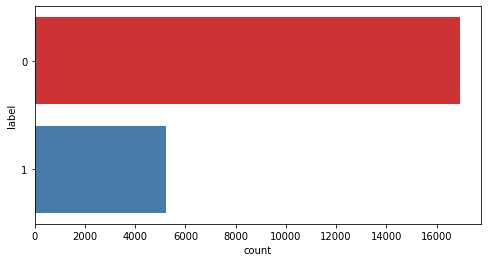

In [10]:
#See the distribution of label column.
df['label'].value_counts()/len(df)
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(y="label", data=df, palette="Set1")
plt.show()

In [11]:
#Some statistical information about the numerical Features, such as mean, std, count.
#From the count row iv noticed that there is some missing values in some of the features.
df.describe(include = 'all')

,Feature_0,Feature_1,Evaporation,Feature_3,Feature_4,Feature_5,Feature_6,MaxTemp,Feature_8,Feature_9,...,Feature_16,Feature_17,Feature_18,Feature_19,WindGustSpeed,Feature_21,Year,Feature_23,Feature_24,label
count,22161.000000,22161.000000,22161.000000,22102.000000,22057.000000,20812,22161,22154.000000,22143.000000,22161.000000,...,22133.000000,22109.000000,21951,21141,20816.000000,22062.000000,22161.000000,22061.000000,22061.000000,22161.000000
unique,NaN,NaN,NaN,NaN,NaN,16,31,NaN,NaN,NaN,...,NaN,NaN,16,16,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,D,a6,NaN,NaN,NaN,...,NaN,NaN,D,E,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,1604,786,NaN,NaN,NaN,...,NaN,NaN,1659,1861,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.188605,19.782469,4.929620,51.547009,68.497982,NaN,NaN,1.648476,0.888041,6.429358,...,21.617133,17.065837,NaN,NaN,39.995484,19.101577,2010.945264,146.971579,191.782875,0.236451
std,0.816631,10.772055,3.572644,20.184353,18.231315,NaN,NaN,0.480275,0.461375,3.381488,...,6.602743,6.409174,NaN,NaN,13.150807,8.546933,0.823740,86.609704,148.833906,0.424912
min,-0.534231,2.776724,0.000000,1.000000,3.000000,NaN,NaN,0.450000,-0.492857,1.000000,...,3.900000,-0.700000,NaN,NaN,11.000000,0.000000,2010.000000,0.000000,0.021012,0.000000
25%,1.627396,12.206173,2.400000,37.000000,57.000000,NaN,NaN,1.271429,0.542857,3.000000,...,16.500000,12.100000,NaN,NaN,31.000000,13.000000,2010.000000,90.000000,76.693088,0.000000
50%,2.170449,17.848944,4.200000,52.000000,69.000000,NaN,NaN,1.607143,0.864286,7.000000,...,21.000000,16.600000,NaN,NaN,39.000000,19.000000,2011.000000,130.000000,162.384678,0.000000
75%,2.718441,25.147043,6.600000,65.000000,82.000000,NaN,NaN,2.007143,1.242857,9.000000,...,26.400000,21.800000,NaN,NaN,48.000000,24.000000,2012.000000,200.000000,273.166651,0.000000


# How many missing values there is in any column.

In [12]:
#how many missing values there is in any column.

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(26)

,Total,Percent
Sunshine,1871,0.084428
Feature_5,1349,0.060873
WindGustSpeed,1345,0.060692
Feature_19,1020,0.046027
Feature_18,210,0.009476
Feature_12,113,0.005099
Feature_11,106,0.004783
Feature_4,104,0.004693
Feature_24,100,0.004512
Feature_23,100,0.004512


For the statistical visualisation i split the data into two different groups.
Continous features, those who 

In [13]:
#divide the data into Categorical and Continuous features.
trainCategorial = [var for var in df.columns if df[var].dtype=='O']
trainContinuous = [var for var in df.columns if df[var].dtype!='O']

print('There are {} categorical variables\n'.format(len(trainCategorial)))

print('The categorical variables are :', trainCategorial)

print('There are {} continous variables\n'.format(len(trainContinuous)))

print('The continous variables are :', trainContinuous)

There are 4 categorical variables

The categorical variables are : ['Feature_5', 'Feature_6', 'Feature_18', 'Feature_19']
There are 21 continous variables

The continous variables are : ['Feature_0', 'Feature_1', 'Evaporation', 'Feature_3', 'Feature_4', 'MaxTemp', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Sunshine', 'Feature_16', 'Feature_17', 'WindGustSpeed', 'Feature_21', 'Year', 'Feature_23', 'Feature_24', 'label']


# Ploting the Categorical features.

Feature_5 :
D    1604
F    1575
E    1558
I    1485
P    1475
K    1469
B    1432
L    1337
C    1330
O    1241
M    1239
N    1098
A    1097
H    1010
G     952
J     910
Name: Feature_5, dtype: int64
Feature_5  contains  17  labels


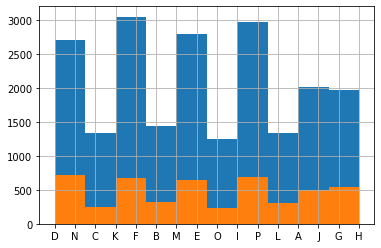

Feature_6 :
a6     786
a7     785
a18    780
a28    779
a29    779
a15    778
a22    773
a12    771
a25    770
a3     769
a1     768
a0     768
a11    767
a17    766
a5     764
a19    762
a30    762
a27    762
a26    756
a20    755
a14    753
a16    753
a23    750
a2     719
a24    691
a9     684
a13    661
a21    550
a8     503
a4     417
a10    280
Name: Feature_6, dtype: int64
Feature_6  contains  31  labels


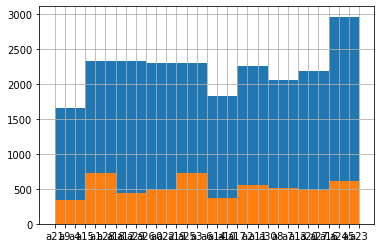

Feature_18 :
D    1659
P    1634
L    1626
K    1599
F    1517
I    1502
M    1444
B    1416
E    1399
C    1319
O    1266
A    1244
N    1206
H    1114
J    1068
G     938
Name: Feature_18, dtype: int64
Feature_18  contains  17  labels


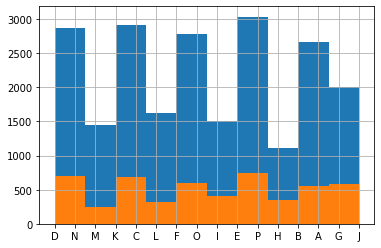

Feature_19 :
E    1861
F    1559
I    1405
O    1396
C    1385
P    1373
D    1343
L    1303
A    1276
G    1272
M    1235
J    1216
K    1174
N    1139
B    1108
H    1096
Name: Feature_19, dtype: int64
Feature_19  contains  17  labels


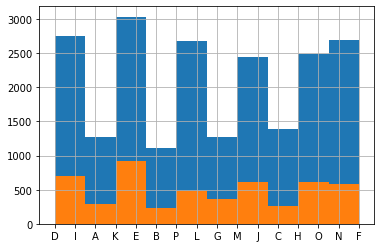

In [14]:
#ploting the Categorical featrues.
#for every feature there is all of his unique values.
#An histofram of his distribution, and indside of it the distribution of label 1.
for Category in trainCategorial:
    print (Category+ " :")
    print(df[Category].value_counts())
    print(Category, ' contains ', len(df[Category].unique()), ' labels')
    df[Category].hist()
    df[Category].unique()
    df[Category][df['label'] == 1].hist()
    plt.show()

# Ploting the Continuous featrues.

Feature_0 :
2.454047    1
2.327237    1
2.353489    1
2.995056    1
2.074012    1
           ..
3.304444    1
1.900744    1
3.482117    1
1.984551    1
1.204392    1
Name: Feature_0, Length: 22161, dtype: int64


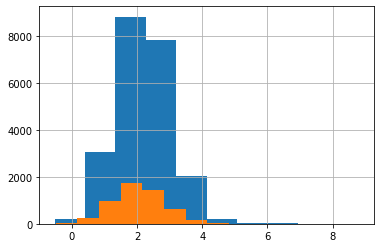

Feature_1 :
11.608158    1
10.198873    1
18.427482    1
13.513724    1
18.798166    1
            ..
21.875370    1
6.871397     1
10.311809    1
12.988787    1
9.764344     1
Name: Feature_1, Length: 22161, dtype: int64


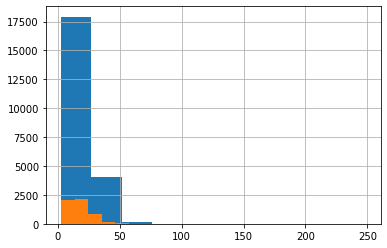

Evaporation :
4.0     878
2.4     614
2.2     606
2.6     597
2.0     597
       ... 
27.0      1
26.8      1
7.1       1
30.6      1
11.9      1
Name: Evaporation, Length: 210, dtype: int64


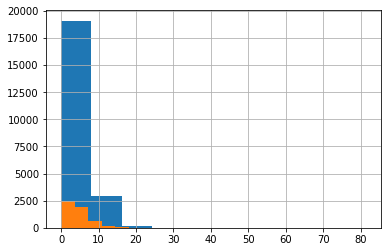

Feature_3 :
59.0     458
52.0     449
54.0     437
53.0     432
45.0     431
        ... 
4.0       14
100.0     12
3.0        8
2.0        7
1.0        2
Name: Feature_3, Length: 100, dtype: int64


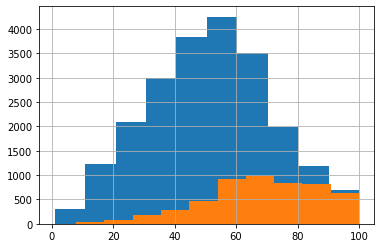

Feature_4 :
67.0    521
68.0    510
70.0    493
71.0    488
64.0    482
       ... 
8.0       6
7.0       4
6.0       2
5.0       2
3.0       1
Name: Feature_4, Length: 97, dtype: int64


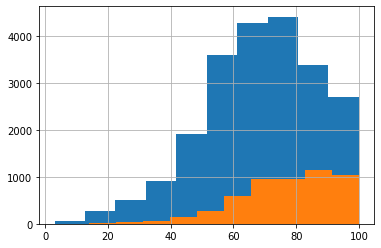

MaxTemp :
1.300000    139
1.321429    136
1.385714    135
1.414286    134
1.214286    132
           ... 
3.435714      1
3.057143      1
3.042857      1
0.628571      1
0.564286      1
Name: MaxTemp, Length: 361, dtype: int64


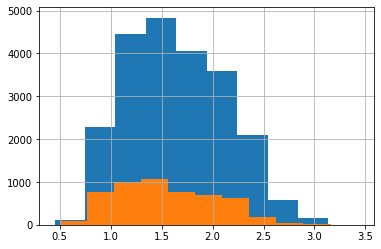

Feature_8 :
 0.607143    150
 0.635714    141
 0.585714    141
 0.885714    139
 0.692857    139
            ... 
-0.478571      1
-0.464286      1
-0.414286      1
 2.050000      1
-0.492857      1
Name: Feature_8, Length: 350, dtype: int64


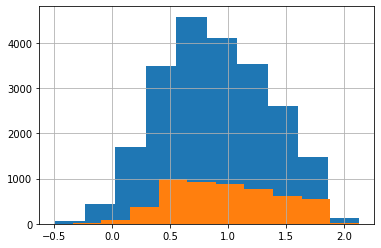

Feature_9 :
5.0     2016
8.0     1992
7.0     1987
6.0     1974
3.0     1966
1.0     1963
9.0     1949
10.0    1943
11.0    1932
2.0     1828
12.0    1316
4.0     1295
Name: Feature_9, dtype: int64


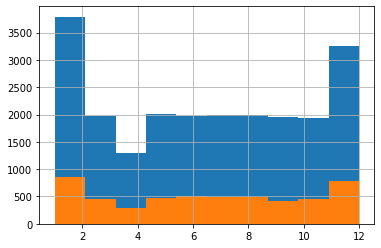

Feature_10 :
0.270314    1
0.120624    1
0.297142    1
0.203009    1
0.149118    1
           ..
0.815718    1
0.201264    1
0.144598    1
0.160709    1
0.278942    1
Name: Feature_10, Length: 22161, dtype: int64


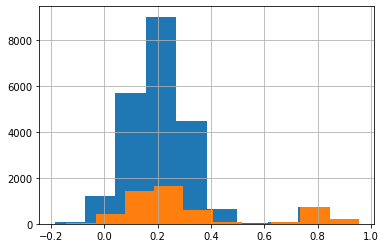

Feature_11 :
1015.3    156
1015.1    146
1015.8    143
1017.0    142
1015.2    140
         ... 
987.2       1
993.3       1
989.0       1
993.1       1
988.3       1
Name: Feature_11, Length: 472, dtype: int64


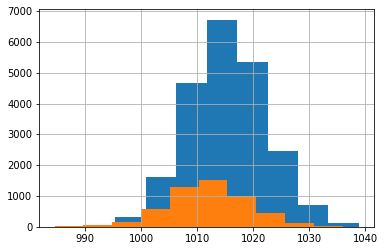

Feature_12 :
1018.0    150
1018.4    150
1015.9    144
1019.5    142
1017.9    142
         ... 
993.0       1
995.1       1
992.9       1
1038.2      1
999.1       1
Name: Feature_12, Length: 476, dtype: int64


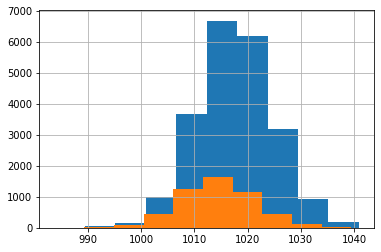

Feature_13 :
0.0    16906
1.0     5174
Name: Feature_13, dtype: int64


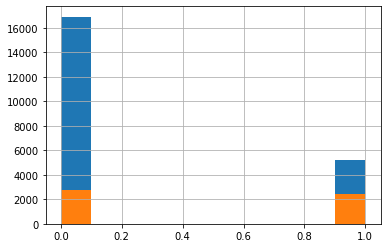

Sunshine :
0.0      672
107.0    295
110.0    293
103.0    290
101.0    279
        ... 
137.0     31
138.0      9
140.0      6
143.0      4
139.0      3
Name: Sunshine, Length: 142, dtype: int64


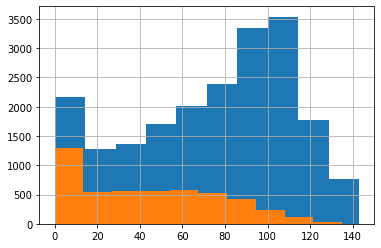

Feature_16 :
18.4    146
17.1    146
20.0    144
17.8    142
20.2    141
       ... 
5.8       1
7.4       1
5.3       1
42.9      1
42.0      1
Name: Feature_16, Length: 368, dtype: int64


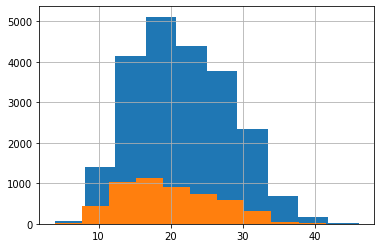

Feature_17 :
 17.0    154
 12.1    145
 14.3    143
 14.8    142
 16.6    141
        ... 
 35.5      1
 34.5      1
 34.1      1
-0.7       1
-0.1       1
Name: Feature_17, Length: 359, dtype: int64


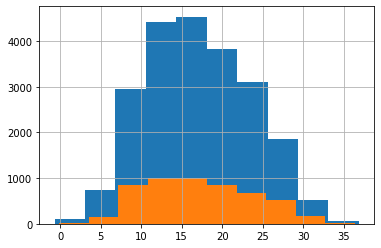

WindGustSpeed :
39.0     1475
35.0     1429
31.0     1376
33.0     1316
37.0     1301
41.0     1208
30.0     1126
28.0      961
43.0      937
44.0      826
48.0      807
46.0      779
50.0      739
26.0      719
24.0      597
52.0      588
54.0      531
22.0      437
56.0      391
57.0      381
20.0      362
59.0      300
61.0      278
19.0      262
17.0      205
63.0      195
65.0      182
67.0      144
72.0      126
69.0      125
70.0      114
15.0      107
74.0       96
76.0       96
13.0       52
78.0       47
80.0       38
83.0       28
81.0       26
85.0       19
87.0       13
93.0       12
91.0       11
89.0       10
11.0       10
98.0        8
96.0        8
94.0        4
100.0       3
106.0       2
102.0       2
107.0       2
109.0       1
113.0       1
104.0       1
135.0       1
115.0       1
Name: WindGustSpeed, dtype: int64


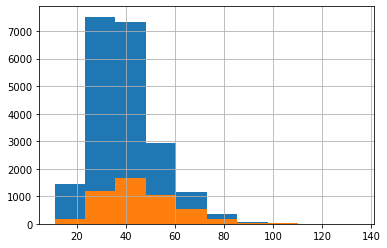

Feature_21 :
17.0    1990
13.0    1977
20.0    1873
19.0    1758
15.0    1755
24.0    1483
11.0    1449
9.0     1445
22.0    1409
28.0    1102
26.0    1057
7.0      794
30.0     751
31.0     664
6.0      550
33.0     425
35.0     371
4.0      247
37.0     223
39.0     191
2.0      112
0.0      103
41.0      92
43.0      78
44.0      46
46.0      44
48.0      23
50.0      18
52.0      15
54.0       8
56.0       4
65.0       3
69.0       1
57.0       1
Name: Feature_21, dtype: int64


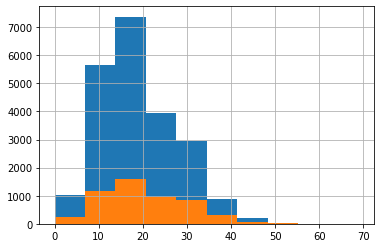

Year :
2010    8158
2011    7058
2012    6945
Name: Year, dtype: int64


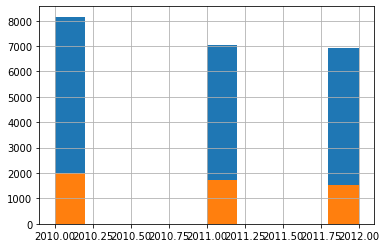

Feature_23 :
90.0     2194
130.0    2153
110.0    1882
170.0    1842
150.0    1713
70.0     1584
190.0    1384
60.0     1354
200.0    1331
240.0     909
0.0       908
220.0     897
40.0      748
260.0     614
280.0     585
20.0      553
300.0     395
310.0     329
350.0     154
330.0     149
370.0      89
390.0      70
410.0      52
430.0      46
440.0      30
460.0      24
520.0      19
500.0      16
480.0      15
560.0       9
540.0       6
570.0       3
610.0       2
670.0       1
590.0       1
Name: Feature_23, dtype: int64


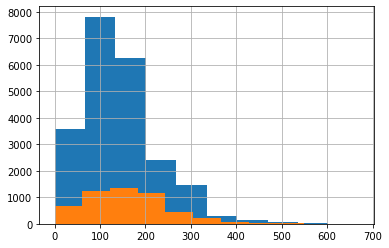

Feature_24 :
290.835195    1
51.144118     1
12.024351     1
25.318325     1
310.626371    1
             ..
50.400945     1
382.861992    1
44.626494     1
153.995212    1
362.195902    1
Name: Feature_24, Length: 22061, dtype: int64


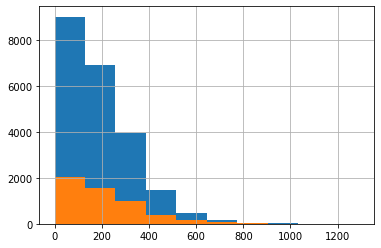

label :
0    16921
1     5240
Name: label, dtype: int64


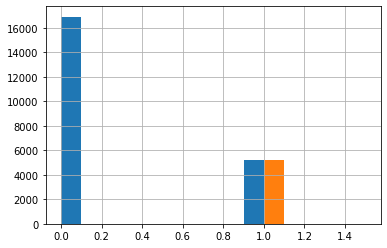

In [15]:
#ploting the Continuous featrues.
#for every feature there is all of his unique values.
#An histofram of his distribution, and indside of it the distribution of label 1.
for Category in trainContinuous:
    print (Category+ " :")
    print(df[Category].value_counts())
    df[Category].hist()
    df[Category][df['label'] == 1].hist()
    plt.show()

# Filling the nan values with random values

In [16]:
#building functions that fill in the nan values with random values from the range.
def fill_with_random(df2, column):
    '''Fill `df2`'s column with name `column` with random data based on non-NaN data from `column`'''
    df = df2.copy()
    df[column] = df[column].apply(lambda x: np.random.choice(df[column].dropna().values) if np.isnan(x) else x)
    return df
def fill_with_random2(df2, column):
    '''Fill `df2`'s column with name `column` with random data based on non-NaN data from `column`'''
    df = df2.copy()
    df[column] = df[column].apply(lambda x: np.random.choice(df[column].dropna().values) if x is np.nan else x)
    return df

In [17]:
for col in trainContinuous:
    df = fill_with_random(df, col)
for col in trainCategorial:
    df = fill_with_random2(df, col)

# checking if the function of replacing the nan values succsess

In [18]:
#checking if the function of replacing the nan values succsess
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(26)

,Total,Percent
label,0,0.0
Feature_11,0,0.0
Feature_1,0,0.0
Evaporation,0,0.0
Feature_3,0,0.0
Feature_4,0,0.0
Feature_5,0,0.0
Feature_6,0,0.0
MaxTemp,0,0.0
Feature_8,0,0.0


# Correlation Heatmap

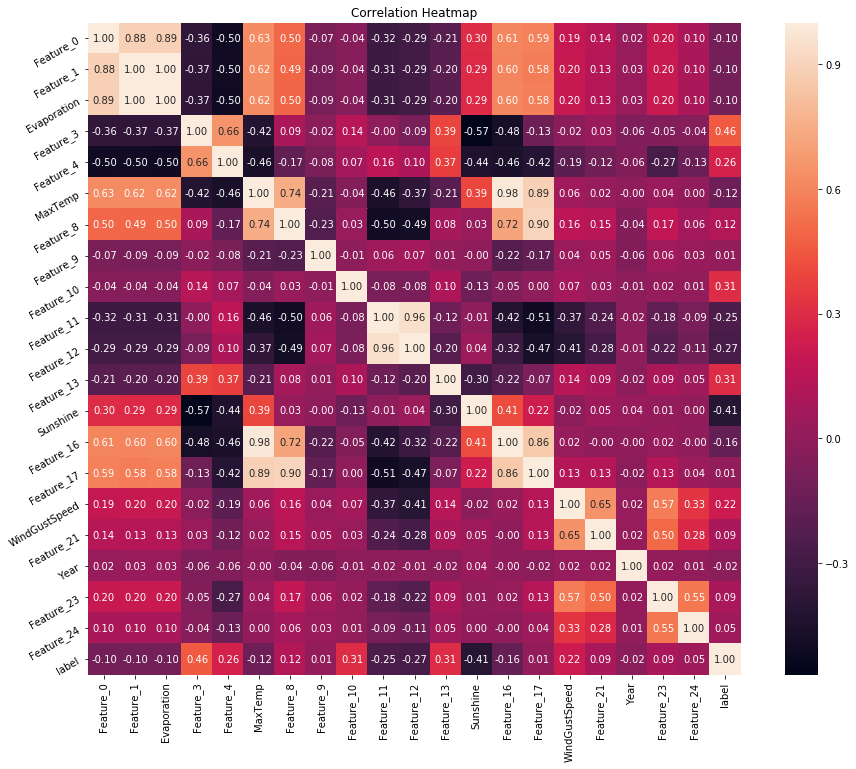

In [19]:
correlation = df.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)                 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [20]:
num_var = ['Feature_0','Feature_1','Evaporation','MaxTemp','Feature_8','Feature_16','Feature_17','Feature_11','Feature_12']

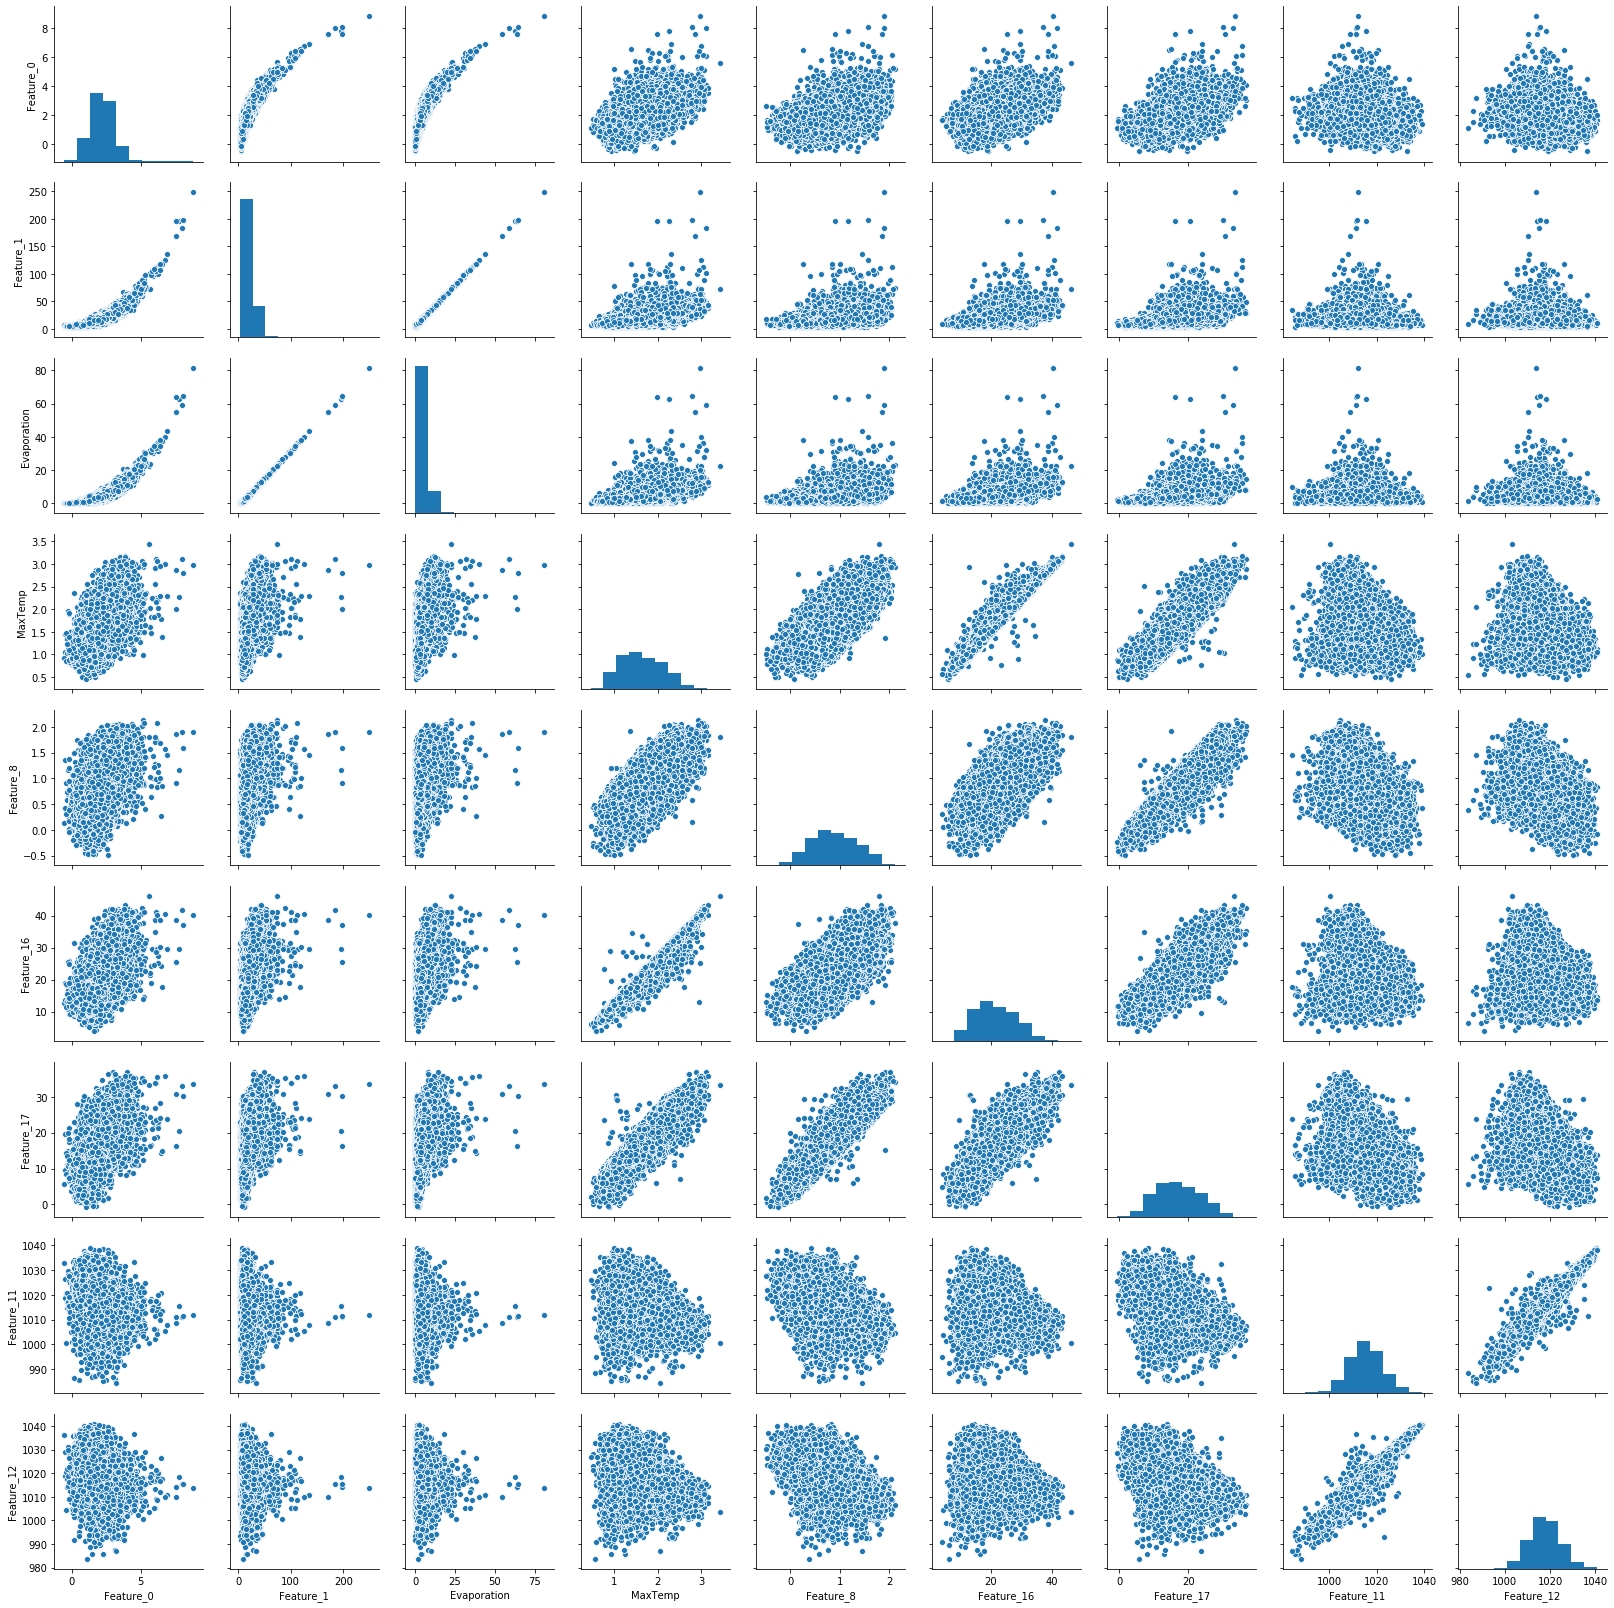

In [21]:
#ploting pair plot of all the features who as correlation with each other
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

In [22]:
#ploting box plots to see if the are outliers
trainContinuous = [var for var in df.columns if df[var].dtype!='O']
trainContinuous.remove('Year')

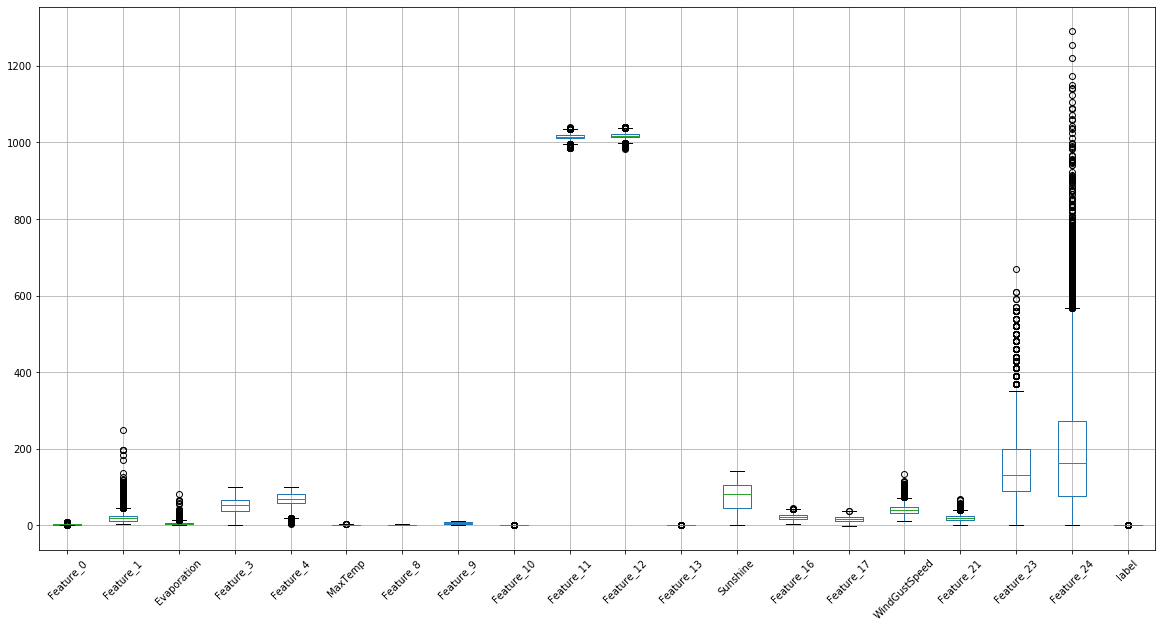

In [23]:
df.boxplot(column=trainContinuous,figsize=(20,10),rot=45)
plt.show()

In [24]:
outliers_cols = ['Feature_0','Feature_1','Evaporation','Feature_4','MaxTemp','Feature_10','Feature_11','Feature_12','Feature_16','Feature_17','WindGustSpeed' ,'Feature_21','Feature_23','Feature_24']
df = df[(np.abs(stats.zscore(df[outliers_cols])) < 3).all(axis=1)]

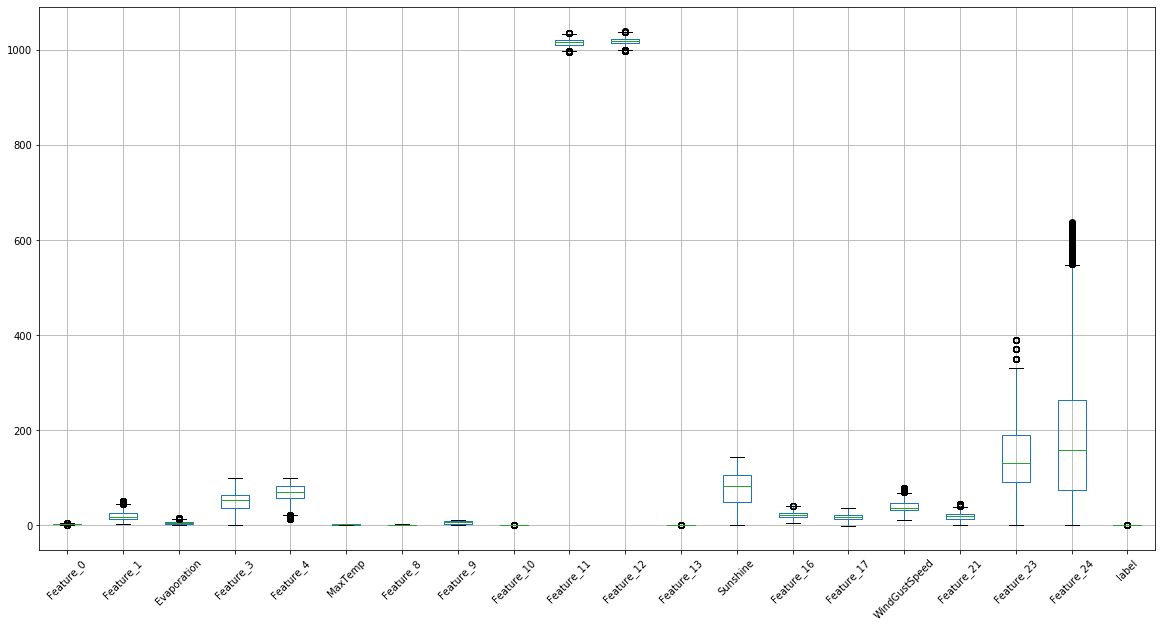

In [25]:
#ploting again to see the boxplot after taking care of the ourliers
df.boxplot(column=trainContinuous,figsize=(20,10),rot=45)
plt.show()


In [26]:
#droping some features for the reason that they have correlation with each other
df.drop(['Feature_0'], axis=1,inplace = True)
df.drop(['Feature_1'], axis=1,inplace = True)
df.drop(['Feature_16'], axis=1,inplace = True)
df.drop(['Feature_11'], axis=1,inplace = True)
df.drop(['Feature_17'], axis=1,inplace = True)
df.drop(['Year'], axis=1,inplace = True)

In [27]:
df['math_manipulation'] = df['MaxTemp']*(df['WindGustSpeed']**2)

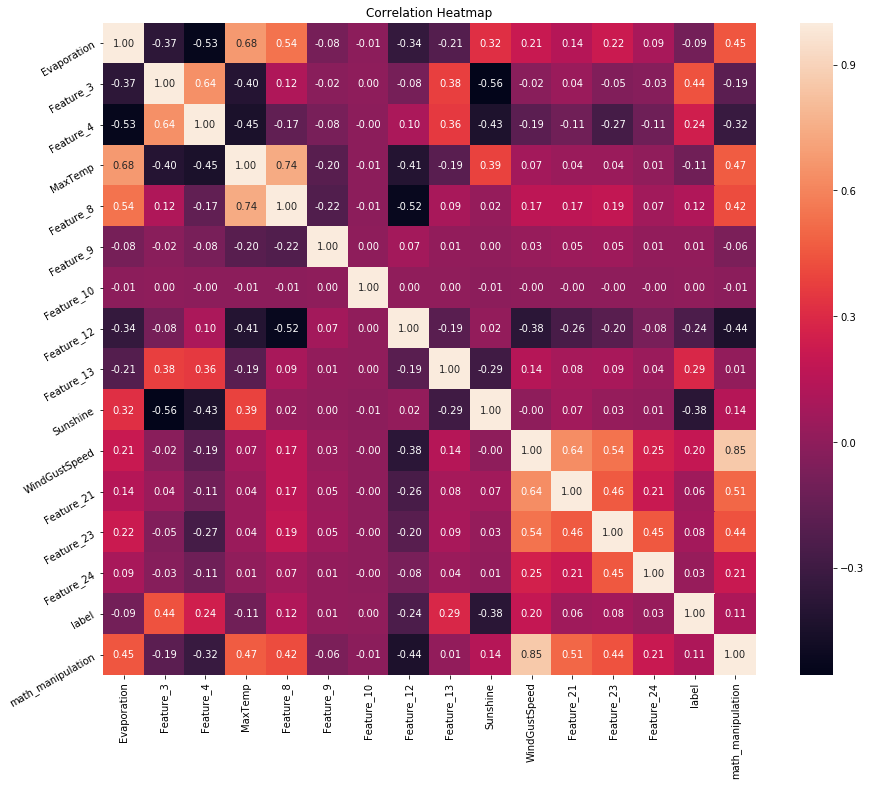

In [28]:
correlation = df.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)                 
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [29]:
X = df.drop(['label'], axis=1)
y = df['label']

In [30]:
#taking care of dummies but of an binary feature.
encoder = ce.BinaryEncoder(cols=['Feature_13'])
X = encoder.fit_transform(X)
X.columns

Index(['Evaporation', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6',
       'MaxTemp', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_12',
       'Feature_13_0', 'Feature_13_1', 'Sunshine', 'Feature_18', 'Feature_19',
       'WindGustSpeed', 'Feature_21', 'Feature_23', 'Feature_24',
       'math_manipulation'],
      dtype='object')

In [31]:
numerical = [col for col in X.columns if X[col].dtypes != 'O']

In [32]:
dum = pd.concat([ pd.get_dummies(X.Feature_5), 
                pd.get_dummies(X.Feature_6),
                pd.get_dummies(X.Feature_18),
                pd.get_dummies(X.Feature_19)], axis=1)

In [33]:
X = pd.concat([dum , X[numerical]],axis =1)
cols = X.columns

In [34]:
#Scaling the data in MinMaxScaler() to be between 0 and 1
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Using sequential Feature Selector

In [36]:
#Sequential Feature Selector:
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#from sklearn.linear_model import LogisticRegression
##pip install mlxtend
#clf1 = LogisticRegression(penalty="l1",C=0.1, tol=0.0001, max_iter=200, solver='liblinear')
#sfs1 = sfs(clf1, 
 #          k_features=25, 
  #         forward=True, 
   #        floating=False, 
    #       scoring='roc_auc',
     #      cv=5)
#sfs1 = sfs1.fit(X, y)
#feat_cols = list(sfs1.k_feature_idx_)
#X_train_sffs = X[:,feat_cols]

In [37]:
#feat_cols = list(sfs1.k_feature_idx_)
feat_cols = [20,25,26,29,34,37,39,48,51,54,56,58,63,67,69,70,74,80,84,86,87,89,90,91,94]
X_train_sffs = X_train[:,feat_cols]
X_test_sffs = X_test[:,feat_cols]

In [38]:
#for the k-fold
#X_sffs = np.concatenate((X_train_sffs, X_test_sffs))
X = pd.DataFrame(data=X,columns=cols)
X_train = pd.DataFrame(data = X_train,columns = cols)
X_test = pd.DataFrame(data = X_test,columns = cols)

In [39]:
#select k_best
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X_df_train = pd.DataFrame(X_train, columns=cols)
X_df_test = pd.DataFrame(X_test, columns=cols) 
bestfeatures = SelectKBest(score_func=f_regression, k=20)
fit = bestfeatures.fit(X_df_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_df_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 10 best features

                Specs        Score
80          Feature_3  3317.086600
89           Sunshine  2414.395653
88       Feature_13_1  1377.852145
87       Feature_13_0  1377.852145
81          Feature_4   914.167748
86         Feature_12   910.736368
90      WindGustSpeed   603.171444
83          Feature_8   206.957624
94  math_manipulation   186.133372
82            MaxTemp   171.562196
79        Evaporation   137.570231
92         Feature_23    88.231994
91         Feature_21    59.940874
33                a24    45.197710
67                  E    45.045481


In [40]:
kbest2 = ['Feature_13_0','Sunshine','Feature_13_1','Feature_3','Feature_4','WindGustSpeed','Feature_12','a24','a15','P','E','a29','J','E','a19']
kbest = ['Feature_13_0','Sunshine','Feature_13_1','Feature_3','Feature_4','WindGustSpeed','Feature_12','a24','a15','math_manipulation','MaxTemp','Evaporation']
X_train_kbest = X_train[kbest]
X_test_kbest = X_test[kbest]

In [41]:
#making 3 types of feature selection datas
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(X_train_kbest,y_train)
print(sum(pca.explained_variance_ratio_))
X_train_pca = pca.transform(X_train_kbest)
X_test_pca = pca.transform(X_test_kbest)

0.8239401057464


# Logistic regression

In [42]:
#[X_train_sffs,X_test_sffs,"sffs"],[X_train_kbest,X_test_kbest,"kbest"]
train_test = [[X_train_pca,X_test_pca,"pca"],[X_train_sffs,X_test_sffs,"sffs"]]
from sklearn.linear_model import LogisticRegression
powers = range(-10,0)
Cs = [10**p for p in powers]
for c in Cs:
    clf = LogisticRegression(penalty="l1",C=c, tol=0.0001, max_iter=200, solver='liblinear')
    for train,test,title in train_test:
        clf.fit(train, y_train)
        y_prob = clf.predict_proba(test)[:,1]
        fpr, tpr, thresholds= metrics.roc_curve(y_test, y_prob)
        if (metrics.auc(fpr,tpr) > 0.75):
            print(f"Model AUC score of feature selection model {title} with hyperparameter C{c} : {metrics.auc(fpr,tpr)}")
#Model AUC score of feature selection model sffs with hyperparameter C0.1 : 0.8149466787401303

Model AUC score of feature selection model pca with hyperparameter C0.001 : 0.7823080898785265
Model AUC score of feature selection model sffs with hyperparameter C0.001 : 0.7708514236728927
Model AUC score of feature selection model pca with hyperparameter C0.01 : 0.8406348110302629
Model AUC score of feature selection model sffs with hyperparameter C0.01 : 0.8428843393381994
Model AUC score of feature selection model pca with hyperparameter C0.1 : 0.8456361507986441
Model AUC score of feature selection model sffs with hyperparameter C0.1 : 0.8676593085131273


# Confusion matrix

The test accuracy is 0.8471788123046554


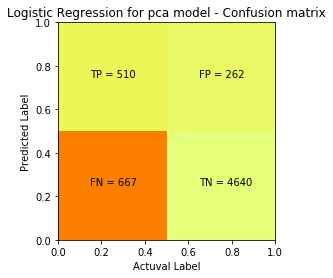

The test accuracy is 0.8582003619016285


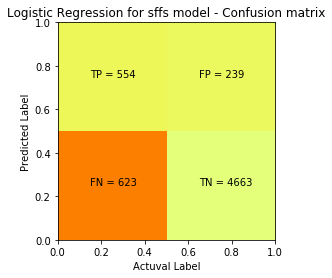

In [66]:
from sklearn.metrics import confusion_matrix
clf = LogisticRegression(penalty="l1",C=0.1, tol=0.0001, max_iter=200, solver='liblinear')
for train,test,title in train_test:
    mdl = clf.fit(train,y_train)
    pred_train = mdl.predict(test)
    #print(confusion_matrix(train_labels, pred_train)) 
    train_con = confusion_matrix(y_test, pred_train)
    train_accuracy = (train_con[0][0]+train_con[1][1])/(train_con[0][0]+train_con[1][1]+(train_con[0][1]+train_con[1][0]))
    print("The test accuracy is " +str(train_accuracy))

    plt.imshow(train_con, cmap=plt.cm.Wistia)
    plt.title(f"Logistic Regression for {title} model - Confusion matrix")
    plt.xlabel('Actuval Label')
    plt.ylabel('Predicted Label')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.text(0.65,0.25, 'TN = '+str(train_con[0][0]))
    plt.text(0.15,0.25, 'FN = '+str(train_con[1][0]))
    plt.text(0.65,0.75, 'FP = '+str(train_con[0][1]))
    plt.text(0.15,0.75, 'TP = '+str(train_con[1][1]))
    plt.show()

# trying to see if the AUC is higher if im changing the threshold

train_test = [[X_train_kbest,X_test_kbest,"kbest"],[X_train_sffs,X_test_sffs,"sffs"],[X_train_pca,X_test_pca,"pca"]]
from sklearn.linear_model import LogisticRegression
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
powers = range(-10,0)
Cs = [10**p for p in powers]
for c in Cs:
        clf = LogisticRegression(penalty="l2",C=c, tol=0.0001, max_iter=200, solver="lbfgs")
        for train,test,title in train_test:
            clf.fit(train, y_train)
            pred_proba_df = pd.DataFrame(clf.predict_proba(test))
            for i in threshold_list:
                Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
                fpr, tpr, thresholds= metrics.roc_curve(y_test.as_matrix().reshape(y_test.as_matrix().size,1), Y_test_pred.iloc[:,1].as_matrix().reshape(Y_test_pred.iloc[:,1].as_matrix().size,1))
                if (metrics.auc(fpr,tpr) > 0.7):
                    print(f"Model AUC score of feature selection model {title} with hyperparameter C{c} and Threshold: {i} : {metrics.auc(fpr,tpr)}")
                    
                    
Model AUC score of feature selection model sffs with hyperparameter C0.01 and Threshold: 0.2 : 0.7287677184806661
Model AUC score of feature selection model sffs with hyperparameter C0.01 and Threshold: 0.25 : 0.7166467685220965
Model AUC score of feature selection model sffs with hyperparameter C0.1 and Threshold: 0.15 : 0.7174771075211139
Model AUC score of feature selection model sffs with hyperparameter C0.1 and Threshold: 0.2 : 0.7428473379743112
Model AUC score of feature selection model sffs with hyperparameter C0.1 and Threshold: 0.25 : 0.7377522594487348
Model AUC score of feature selection model sffs with hyperparameter C0.1 and Threshold: 0.3 : 0.7366614181705626
Model AUC score of feature selection model sffs with hyperparameter C0.1 and Threshold: 0.35 : 0.7164383666987727
Model AUC score of feature selection model sffs with hyperparameter C0.1 and Threshold: 0.4 : 0.7008174580745133
train_test = [[X_train_kbest,X_test_kbest,"kbest"],[X_train_sffs,X_test_sffs,"sffs"],[X_train_pca,X_test_pca,"pca"]

# GRID SEARCH
leaf_size = [2,5,7,9,14,18,22,27,29,33,36,39,42,45,48,50]
n_neighbors = [2,5,7,9,14,18,22,27,29,33]
algorithm =['auto', 'ball_tree', 'kd_tree', 'brute']
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p, algorithm=algorithm)
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, hyperparameters, cv=10)

best_model = clf.fit(X_train_pca, y_train)
print(f"{title} feature selection")
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
results:
#kbest dataset
#Best leaf_size: 2
#Best p: 1
#Best n_neighbors: 27
#Best algorithem: auto
#normal dataset
#Best leaf_size: 2
#Best p: 1
#Best n_neighbors: 27
#Best algorithem: auto
#pca feature selection
#Best leaf_size: 2
#Best p: 2
#Best n_neighbors: 27

# K-Nearest neighbors

In [46]:
from sklearn.neighbors import KNeighborsClassifier
leaf_size = [2,9,27,36,50]
n_neighbors = [2,14,18,29,50,70,100]
p=[1,2]

for train,test,title in train_test:
    for x in leaf_size:
        for n in n_neighbors:
            for t in p:
                clf = KNeighborsClassifier(n_neighbors=n, algorithm='auto', leaf_size=x, p=t)
                clf.fit(train, y_train)
                y_prob = clf.predict_proba(test)[:,1]
                fpr, tpr, thresholds= metrics.roc_curve(y_test, y_prob)
                if (metrics.auc(fpr,tpr) > 0.83):
                    print(f"Model AUC score of feature selection model {title}: {metrics.auc(fpr,tpr)}")
                    print(f"leafsize {x},n_neighbors:{n},p{t}")

Model AUC score of feature selection model pca: 0.8334563043121823
leafsize 2,n_neighbors:29,p1
Model AUC score of feature selection model pca: 0.8360657328845023
leafsize 2,n_neighbors:29,p2
Model AUC score of feature selection model pca: 0.8420186895089375
leafsize 2,n_neighbors:50,p1
Model AUC score of feature selection model pca: 0.8407440896802477
leafsize 2,n_neighbors:50,p2
Model AUC score of feature selection model pca: 0.8455181194574233
leafsize 2,n_neighbors:70,p1
Model AUC score of feature selection model pca: 0.8448188574219528
leafsize 2,n_neighbors:70,p2
Model AUC score of feature selection model pca: 0.8460660725929146
leafsize 2,n_neighbors:100,p1
Model AUC score of feature selection model pca: 0.8467581418227159
leafsize 2,n_neighbors:100,p2
Model AUC score of feature selection model pca: 0.8334563043121823
leafsize 9,n_neighbors:29,p1
Model AUC score of feature selection model pca: 0.8360657328845023
leafsize 9,n_neighbors:29,p2
Model AUC score of feature selection m

# Random forest classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
def evaluate_acc(model, test_features, test_labels,a,b,c,d,e,f,title):
    accuracy = model.score(test_features, test_labels)
    y_prob = model.predict_proba(test_features)[:,1]
    fpr, tpr, thresholds= roc_curve(test_labels, y_prob)
    if metrics.auc(fpr,tpr) >= 0.86 :
        print('Model Performance')
        print(f"Model AUC score of feature selection model {title}: {metrics.auc(fpr,tpr)}")
        print('n_estimators = {}, max_features = {}, max_depth = {} ,min_samples_split = {} ,min_samples_leaf = {} ,bootstrap = {}'.format(a,b,c,d,e,f))
    
    return metrics.auc(fpr,tpr)
n_estimators = [int(x) for x in np.linspace(start = 30, stop = 200, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [48]:
def Best_hyper(n_estimators, max_features, max_depth ,min_samples_split ,min_samples_leaf ,bootstrap):
    counter = 0
    for a in n_estimators:
        for b in max_features:
            for c in max_depth:
                for d in min_samples_split:
                    for e in min_samples_leaf:
                        for f in bootstrap:
                            if counter > 45:
                                return 1
                            for train,test,title in train_test:
                                clf = RandomForestClassifier(n_estimators = a, max_features = b, max_depth = c, min_samples_split = d, min_samples_leaf = e, bootstrap = f)
                                model = clf.fit(train,y_train)
                                res = evaluate_acc(model,test,y_test,a,b,c,d,e,f,title)
                                if (res >= 0.86) :
                                    counter +=1
                            
Best_hyper(n_estimators, max_features, max_depth ,min_samples_split ,min_samples_leaf ,bootstrap)

Model Performance
Model AUC score of feature selection model sffs: 0.8663706697143365
n_estimators = 30, max_features = auto, max_depth = 10 ,min_samples_split = 2 ,min_samples_leaf = 1 ,bootstrap = True
Model Performance
Model AUC score of feature selection model sffs: 0.8685101394295047
n_estimators = 30, max_features = auto, max_depth = 10 ,min_samples_split = 2 ,min_samples_leaf = 1 ,bootstrap = False
Model Performance
Model AUC score of feature selection model sffs: 0.8697370760880981
n_estimators = 30, max_features = auto, max_depth = 10 ,min_samples_split = 2 ,min_samples_leaf = 2 ,bootstrap = True
Model Performance
Model AUC score of feature selection model sffs: 0.8676777671590012
n_estimators = 30, max_features = auto, max_depth = 10 ,min_samples_split = 2 ,min_samples_leaf = 2 ,bootstrap = False
Model Performance
Model AUC score of feature selection model sffs: 0.8673518377358505
n_estimators = 30, max_features = auto, max_depth = 10 ,min_samples_split = 2 ,min_samples_leaf 

Model Performance
Model AUC score of feature selection model sffs: 0.871702965203806
n_estimators = 30, max_features = auto, max_depth = 30 ,min_samples_split = 2 ,min_samples_leaf = 4 ,bootstrap = False
Model Performance
Model AUC score of feature selection model sffs: 0.8685743547186712
n_estimators = 30, max_features = auto, max_depth = 30 ,min_samples_split = 5 ,min_samples_leaf = 1 ,bootstrap = True
Model Performance
Model AUC score of feature selection model sffs: 0.8634151198668066
n_estimators = 30, max_features = auto, max_depth = 30 ,min_samples_split = 5 ,min_samples_leaf = 1 ,bootstrap = False
Model Performance
Model AUC score of feature selection model sffs: 0.8665653087689487
n_estimators = 30, max_features = auto, max_depth = 30 ,min_samples_split = 5 ,min_samples_leaf = 2 ,bootstrap = True
Model Performance
Model AUC score of feature selection model sffs: 0.8689267155361483
n_estimators = 30, max_features = auto, max_depth = 30 ,min_samples_split = 5 ,min_samples_leaf =

1

# Artificial Neural network

In [49]:
from sklearn.neural_network import MLPClassifier
alphas = [0.005 ,0.01 , 0.1 ,1]
num = [10 , 20 ,30]
accuracy_list2 =[]
for alph in alphas:
    for n in num:
        ann_clf = MLPClassifier(#-----The architecture:------#
                        hidden_layer_sizes= (n,),  # What is the architecture? what happens if we add more layers?
                        alpha = alph, # The regularization: loss + alpha*W^2, you know it as lambda.
                        solver = "sgd", # Stochastic Gradient Descent, other optimizers are out of the scope of the course.
                        learning_rate_init = 0.001, # What is the initial learning rate? in some optimizers the learning rate changes.
                        verbose=False,
                        tol = 1e-4, # A broad concept of converges, when we can say the algorithm converged?
                        max_iter = 200, # The total number of epochs.One epoch=one forward and one backard pass of all the training examples.
                        random_state = 1)
        for train,test,title in train_test:
            ann_clf.fit(train, y_train)
            accuracy_list2.append([ann_clf.score(test, y_test),title,alph,n])

In [50]:
alpha_opt_mlp = 0
alpha = 0
hl = 0
j= []
for x,y,z,n in accuracy_list2:
    if x > alpha_opt_mlp:
        alpha_opt_mlp = x
        alpha = z
        hl = n
        j.append(y)
    
    

print(f"The optimal lambda is:{alpha} and {n} hyden layers for {j[0]} model")

The optimal lambda is:0.1 and 30 hyden layers for pca model


In [51]:
accuracy_list2

[[0.846520809343642, 'pca', 0.005, 10],
 [0.8535943411745353, 'sffs', 0.005, 10],
 [0.847014311564402, 'pca', 0.005, 20],
 [0.8544168448758019, 'sffs', 0.005, 20],
 [0.8461918078631354, 'pca', 0.005, 30],
 [0.8542523441355486, 'sffs', 0.005, 30],
 [0.8466853100838954, 'pca', 0.01, 10],
 [0.8535943411745353, 'sffs', 0.01, 10],
 [0.8471788123046554, 'pca', 0.01, 20],
 [0.8544168448758019, 'sffs', 0.01, 20],
 [0.8461918078631354, 'pca', 0.01, 30],
 [0.8542523441355486, 'sffs', 0.01, 30],
 [0.8468498108241487, 'pca', 0.1, 10],
 [0.853923342655042, 'sffs', 0.1, 10],
 [0.847507813785162, 'pca', 0.1, 20],
 [0.8549103470965619, 'sffs', 0.1, 20],
 [0.8473433130449087, 'pca', 0.1, 30],
 [0.8547458463563086, 'sffs', 0.1, 30],
 [0.8440532982398421, 'pca', 1, 10],
 [0.8524428359927619, 'sffs', 1, 10],
 [0.8430662937983221, 'pca', 1, 20],
 [0.852936338213522, 'sffs', 1, 20],
 [0.8440532982398421, 'pca', 1, 30],
 [0.8534298404342819, 'sffs', 1, 30]]

In [52]:
from sklearn.metrics import confusion_matrix
def mlp(train,test,title):
    print(f"Model {title}")
    ann_clf = MLPClassifier(#-----The architecture:------#
                        hidden_layer_sizes= (20,),  # What is the architecture? what happens if we add more layers?
                        alpha = 1, # The regularization: loss + alpha*W^2, you know it as lambda.
                        solver = "sgd", # Stochastic Gradient Descent, other optimizers are out of the scope of the course.
                        learning_rate_init = 0.001, # What is the initial learning rate? in some optimizers the learning rate changes.
                        verbose=False,
                        tol = 1e-4, # A broad concept of converges, when we can say the algorithm converged?
                        max_iter = 200, # The total number of epochs.One epoch=one forward and one backard pass of all the training examples.
                        random_state = 1)
    ann_clf.fit(train,y_train)
    pred_train = ann_clf.predict(train)
    print(confusion_matrix(y_train, pred_train))
    y_prob = ann_clf.predict_proba(train)[:,1]
    fpr, tpr, thresholds= metrics.roc_curve(y_train, y_prob)
    print(f"Model AUC train score: {metrics.auc(fpr,tpr)}")


    pred_test = ann_clf.predict(test)
    print(confusion_matrix(y_test, pred_test))
    y_prob = ann_clf.predict_proba(test)[:,1]
    fpr, tpr, thresholds= metrics.roc_curve(y_test, y_prob)
    print(f"Model AUC test score: {metrics.auc(fpr,tpr)}")


In [53]:
for train,test,title in train_test:
    mlp(train,test,title)

Model pca
[[10902   470]
 [ 1796  1015]]
Model AUC train score: 0.8475867944046258
[[4681  221]
 [ 733  444]]
Model AUC test score: 0.8441970697029665
Model sffs
[[10902   470]
 [ 1631  1180]]
Model AUC train score: 0.8698172773085184
[[4682  220]
 [ 674  503]]
Model AUC test score: 0.86520907492893


# Support Vector machine

In [54]:
from sklearn import svm
C= [0.1,1, 10, 100]
Gs = [0.1, 0.01]
kernels= ["rbf","sigmoid"]
for g in Gs:
  for k in kernels:
   for c in C:
        sv = svm.SVC(kernel=k, C = c, gamma=g, probability=True)
        for train,test,title in train_test:
            sv.fit(train, y_train)
            y_prob = sv.predict_proba(test)[:,1]
            fpr, tpr, thresholds= metrics.roc_curve(y_test, y_prob)
            print(f"Model {title} with kernel {k} and gamma {g} and C {c}  AUC: {metrics.auc(fpr,tpr)}")

Model pca with kernel rbf and gamma 0.1 and C 0.1  AUC: 0.8368030387957406
Model sffs with kernel rbf and gamma 0.1 and C 0.1  AUC: 0.8657529550298857
Model pca with kernel rbf and gamma 0.1 and C 1  AUC: 0.8066476776597001
Model sffs with kernel rbf and gamma 0.1 and C 1  AUC: 0.8696150583726512
Model pca with kernel rbf and gamma 0.1 and C 10  AUC: 0.8005320596347719
Model sffs with kernel rbf and gamma 0.1 and C 10  AUC: 0.8534062874480861
Model pca with kernel rbf and gamma 0.1 and C 100  AUC: 0.7911763859669921
Model sffs with kernel rbf and gamma 0.1 and C 100  AUC: 0.84943204566513
Model pca with kernel sigmoid and gamma 0.1 and C 0.1  AUC: 0.8435091601680101
Model sffs with kernel sigmoid and gamma 0.1 and C 0.1  AUC: 0.8653543176072602
Model pca with kernel sigmoid and gamma 0.1 and C 1  AUC: 0.8450089034801741
Model sffs with kernel sigmoid and gamma 0.1 and C 1  AUC: 0.8655394240278533
Model pca with kernel sigmoid and gamma 0.1 and C 10  AUC: 0.8191429676718918
Model sffs w

In [55]:
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
from sklearn import neighbors
def KfoldPlot(X, y, clf, k,title):
    kf = KFold(n_splits= k, random_state=None, shuffle=False)
    fig1 = plt.figure(figsize=[12,12])
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,100)
    i = 1
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_prob = clf.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds= roc_curve(y_test, y_prob)
        tprs.append(interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d' % (i))
        i= i+1

    plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='blue',label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"ROC plot for {title}")
    plt.legend(loc="lower right")
    plt.show()

In [60]:
#best for pca
ann_clf2 = MLPClassifier(#-----The architecture:------#
                hidden_layer_sizes= (20,),  # What is the architecture? what happens if we add more layers?
                alpha = 0.1, # The regularization: loss + alpha*W^2, you know it as lambda.
                solver = "sgd", # Stochastic Gradient Descent, other optimizers are out of the scope of the course.
                learning_rate_init = 0.001, # What is the initial learning rate? in some optimizers the learning rate changes.
                verbose=False,
                tol = 1e-4, # A broad concept of converges, when we can say the algorithm converged?
                max_iter = 200, # The total number of epochs.One epoch=one forward and one backard pass of all the training examples.
                random_state = 1)
gnb2 = GaussianNB()
rf2 = RandomForestClassifier(n_estimators = 30, max_features = 'auto', max_depth = 20 ,min_samples_split = 10 ,min_samples_leaf = 4 ,bootstrap = False)
logreg2 = LogisticRegression(penalty="l1",C=0.1, tol=0.0001, max_iter=200, solver='liblinear')
knn2 = neighbors.KNeighborsClassifier(n_neighbors=70, algorithm='auto', leaf_size=9, p=1)
svmm2 = svm.SVC(kernel="sigmoid", C = 1, gamma=0.1, probability=True)
models2 = [[gnb2,"Gaussian Naive Bayes model"], [rf2,"Random forest model"] ,[logreg2,"Logistic regression model"],[knn2,"K-Nearst Neighbor model"], [svmm2,"Support Vector machine model"],[ann_clf2,"Artificial neural network model"]]

In [61]:
#best for sffs
ann_clf = MLPClassifier(#-----The architecture:------#
                hidden_layer_sizes= (20,),  # What is the architecture? what happens if we add more layers?
                alpha = 0.1, # The regularization: loss + alpha*W^2, you know it as lambda.
                solver = "sgd", # Stochastic Gradient Descent, other optimizers are out of the scope of the course.
                learning_rate_init = 0.001, # What is the initial learning rate? in some optimizers the learning rate changes.
                verbose=False,
                tol = 1e-4, # A broad concept of converges, when we can say the algorithm converged?
                max_iter = 200, # The total number of epochs.One epoch=one forward and one backard pass of all the training examples.
                random_state = 1)
gnb = GaussianNB()
rf = RandomForestClassifier(n_estimators = 30, max_features = 'auto', max_depth = 20 ,min_samples_split = 10 ,min_samples_leaf = 4 ,bootstrap = False)
logreg = LogisticRegression(penalty="l1",C=0.1, tol=0.0001, max_iter=200, solver='liblinear')
knn = neighbors.KNeighborsClassifier(n_neighbors=50, algorithm='auto', leaf_size=50, p=1)
svmm = svm.SVC(kernel="rbf", C = 100, gamma=0.01, probability=True)
models = [[gnb,"Gaussian Naive Bayes model"], [rf,"Random forest model"] ,[logreg,"Logistic regression model"],[knn,"K-Nearst Neighbor model"], [svmm,"Support Vector machine model"],[ann_clf,"Artificial neural network model"]]

In [62]:
tot_x = pd.concat([X_train_kbest,X_test_kbest])
tot_y = pd.concat([y_train,y_test])

In [63]:
tot_x = tot_x.to_numpy()
tot_y = tot_y.to_numpy()

# SFFS ROC Plots

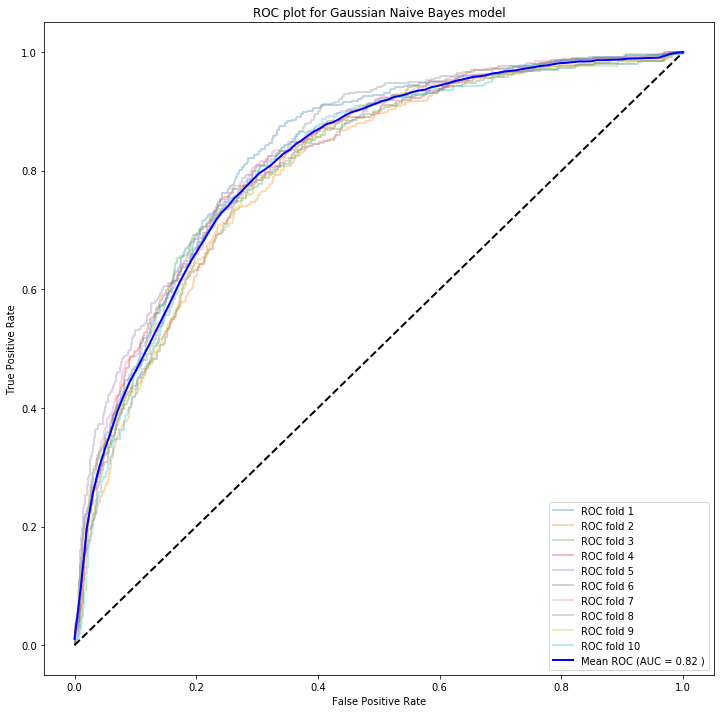

None


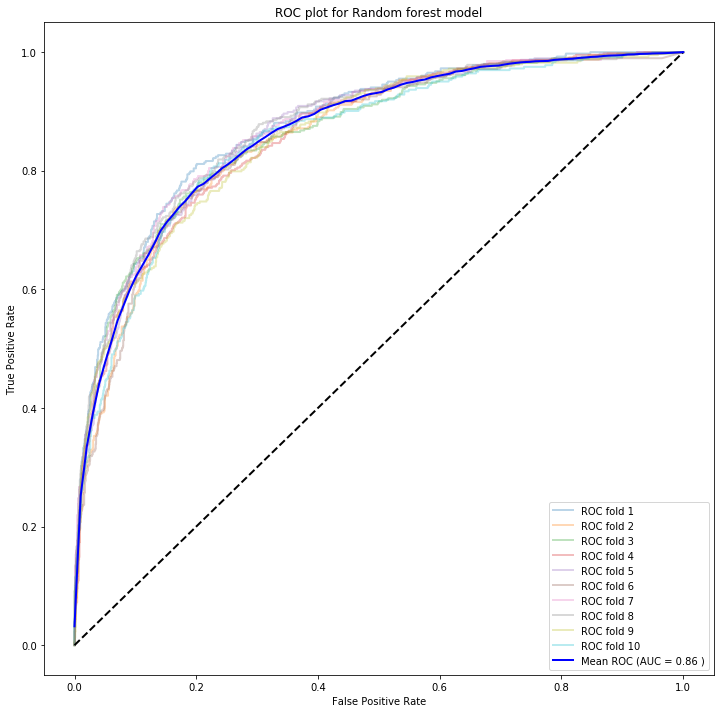

None


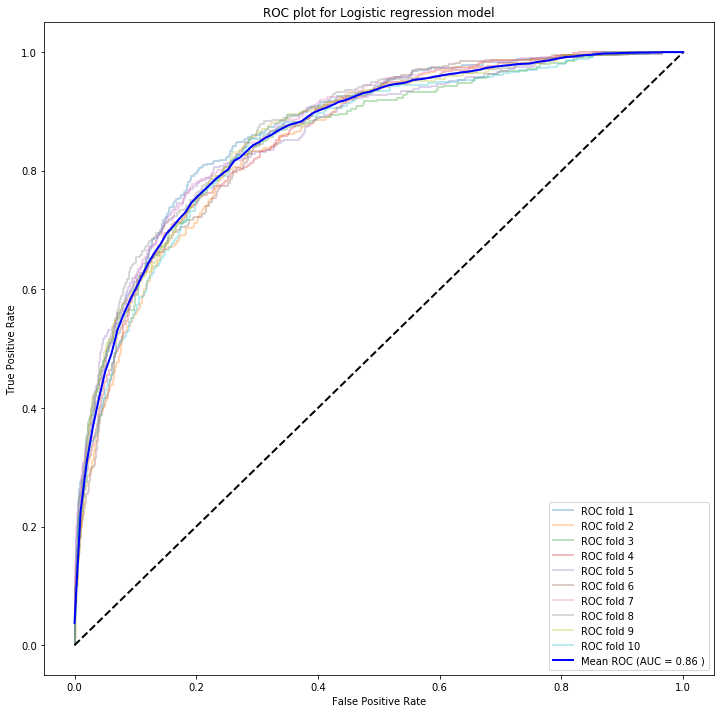

None


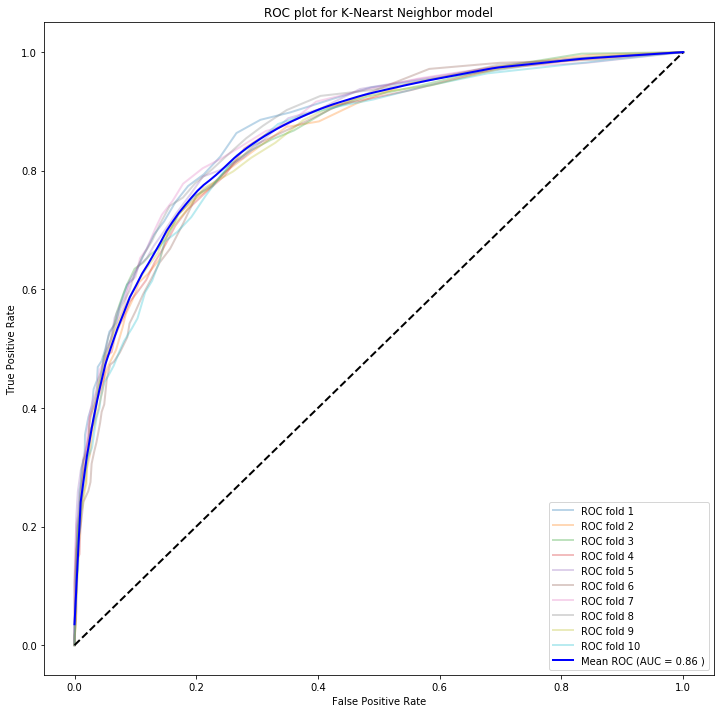

None


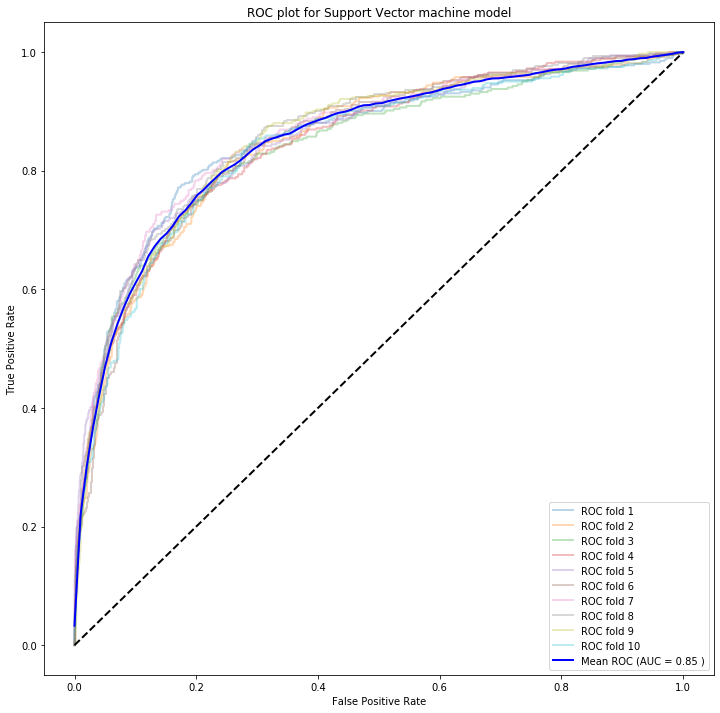

None


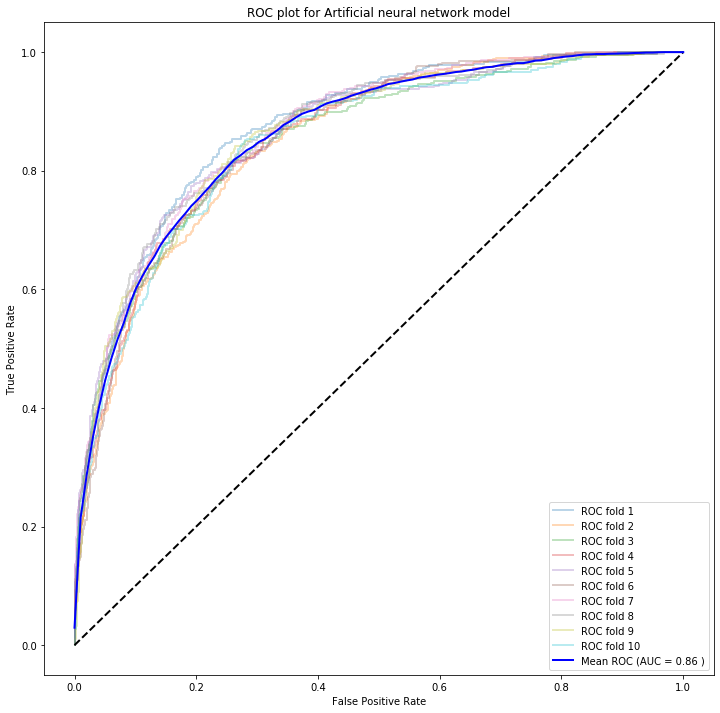

None


In [64]:
for model,title in models:
    print(KfoldPlot(tot_x, tot_y, model, 10,title))

# PCA ROC Plots

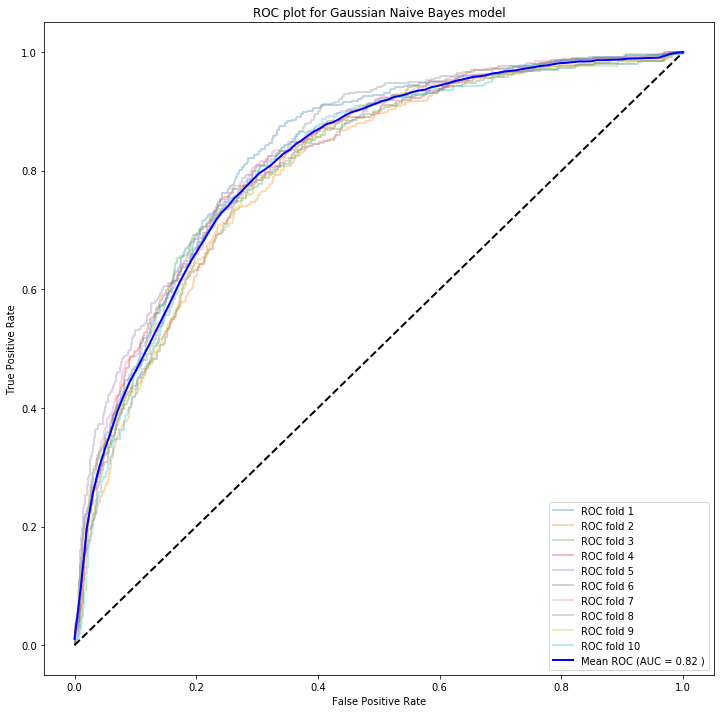

None


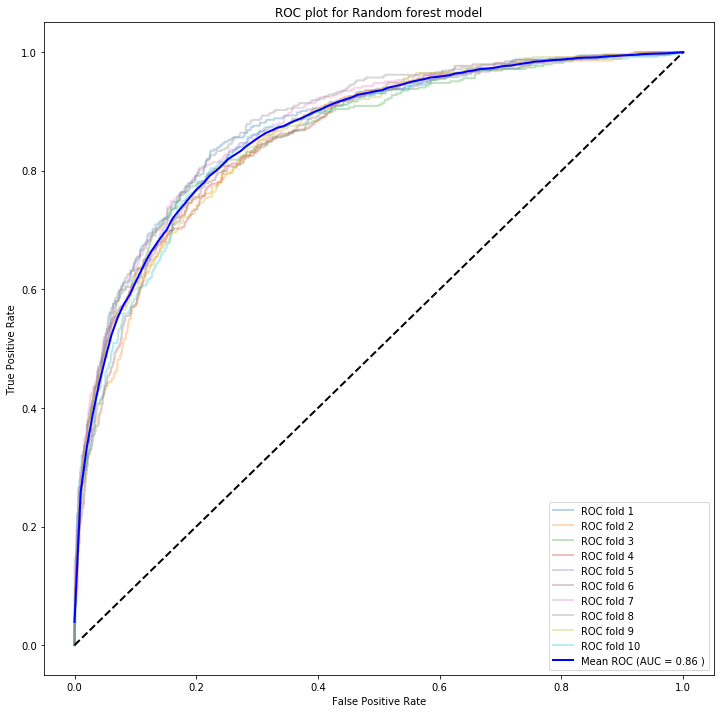

None


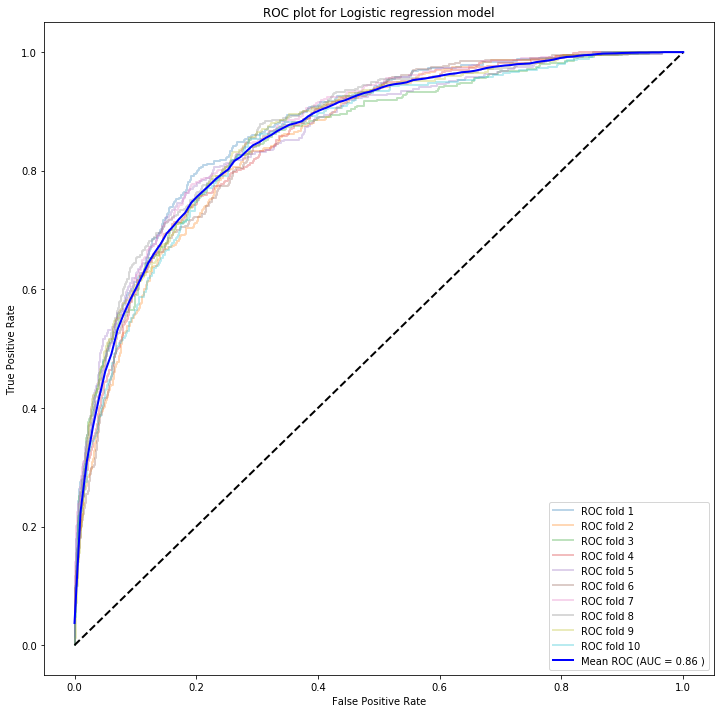

None


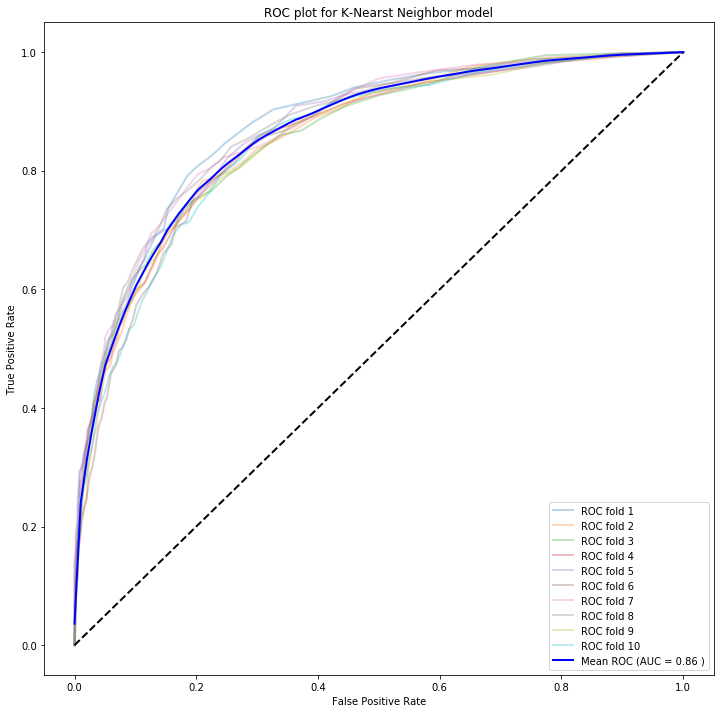

None


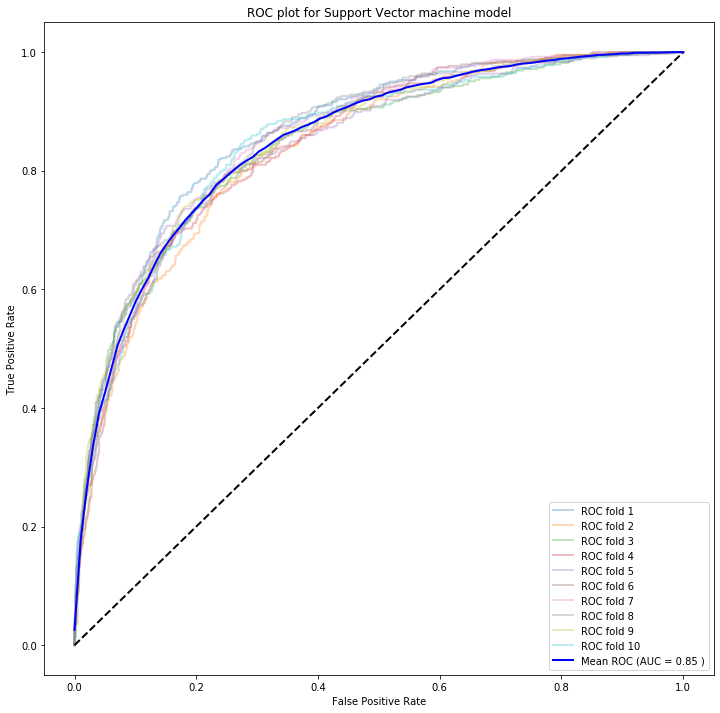

None


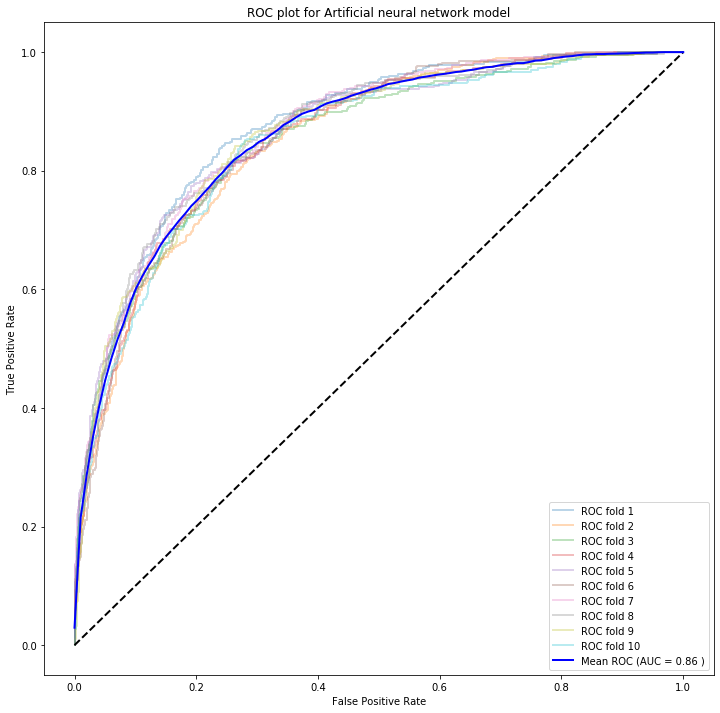

None


In [65]:
for model,title in models2:
    print(KfoldPlot(tot_x, tot_y, model, 10,title))

In [152]:
df_test = pd.read_csv('test_without_target.csv')

In [153]:
df_test = df_test.drop('Feature_14', axis =1)
df_test['Feature_13'] = df.Feature_13.apply(lambda x: np.NaN if x == 'unknown' else x)
df_test['Feature_13'] = df['Feature_13'].astype(float)
df_test['Feature_9'] = df['Feature_9'].astype(float)

In [154]:
df_test.drop(['Unnamed: 0'], axis=1,inplace = True)
df_test.drop(['Feature_0'], axis=1,inplace = True)
df_test.drop(['Feature_1'], axis=1,inplace = True)
df_test.drop(['Feature_16'], axis=1,inplace = True)
df_test.drop(['Feature_11'], axis=1,inplace = True)
df_test.drop(['Feature_17'], axis=1,inplace = True)
df_test.drop(['Year'], axis=1,inplace = True)
df_test['math_manipulation'] = df_test['MaxTemp']*(df_test['WindGustSpeed']**2)

In [155]:
trainCategorial = [var for var in df_test.columns if df_test[var].dtype=='O']
trainContinuous = [var for var in df_test.columns if df_test[var].dtype!='O']


In [156]:
for col in trainContinuous:
    df_test = fill_with_random(df_test, col)
for col in trainCategorial:
    df_test = fill_with_random2(df_test, col)

In [157]:
encoder = ce.BinaryEncoder(cols=['Feature_13'])
df_test = encoder.fit_transform(df_test)
numerical = [col for col in df_test.columns if df_test[col].dtypes != 'O']

In [158]:
dum = pd.concat([ pd.get_dummies(df_test.Feature_5), 
                pd.get_dummies(df_test.Feature_6),
                pd.get_dummies(df_test.Feature_18),
                pd.get_dummies(df_test.Feature_19)], axis=1)

In [159]:
df_test = pd.concat([dum , df_test[numerical]],axis =1)
cols = df_test.columns

In [160]:
df_test = min_max_scaler.fit_transform(df_test)
print(df_test.shape)

(7387, 95)


In [161]:
feat_cols = [20,25,26,29,34,37,39,48,51,54,56,58,63,67,69,70,74,80,84,86,87,89,90,91,94]
df_test = pd.DataFrame(df_test[:,feat_cols])
print(df_test.shape)

(7387, 25)


In [163]:
X_train_sffs = pd.DataFrame(X_train_sffs)
X_test_sffs = pd.DataFrame(X_test_sffs)

In [164]:
to_x = pd.concat([X_train_sffs,X_test_sffs])
to_y = pd.concat([y_train,y_test])

In [165]:
to_x = to_x.to_numpy()
to_y = to_y.to_numpy()

In [169]:
rf = RandomForestClassifier(n_estimators = 30, max_features = 'auto', max_depth = 20 ,min_samples_split = 10 ,min_samples_leaf = 4 ,bootstrap = False)
rff = rf.fit(to_x,to_y)
y_prob = rf.predict_proba(df_test)
y_out = y_prob[:,1]
print(y_out)
output = pd.DataFrame(y_out, columns=['pred_proba'])
output.to_csv('Submission_308481324.csv', index=True)


[0.02741071 0.37706604 0.02490029 ... 0.02754931 0.02855394 0.12972798]


In [172]:
#checking for overfitting
rff = rf.fit(X_train_sffs,y_train)
y_prob = rff.predict_proba(X_train_sffs)[:,1]
fpr, tpr, thresholds= roc_curve(y_train, y_prob)
print(f"train AUC {metrics.auc(fpr,tpr)}")

train AUC 0.9899250131981125


In [173]:
y_prob = rff.predict_proba(X_test_sffs)[:,1]
fpr, tpr, thresholds= roc_curve(y_test, y_prob)
print(f"test AUC {metrics.auc(fpr,tpr)}")

test AUC 0.8699586664988923
